In [1]:
import projetannuel

In [2]:
import pandas as pd

# Classification Linéaire

In [3]:
df = pd.read_csv("../data/BankNote_Authentication.csv", sep=',')

df

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [4]:
import numpy as np
np.random.seed(0)

def split_dataframe(df, test_ratio=0.2, seed=42):
    np.random.seed(seed)
    shuffled_indices = np.random.permutation(len(df))
    test_set_size = int(len(df) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return df.iloc[train_indices], df.iloc[test_indices]

train_df, test_df = split_dataframe(df, test_ratio=0.2)

In [5]:
Y_train = [ x for x in train_df["class"] ]
print(f"Y_train len : {len(Y_train)}")
Y_test = [x for x in test_df["class"]]
print(f"Y_test len : {len(Y_test)}")
Y_train_bef = Y_train
Y_test_bef = Y_test
Y_train = projetannuel.float_labels(Y_train)
Y_test = projetannuel.float_labels(Y_test)

Y_train len : 1098
Y_test len : 274


In [6]:
X = train_df[['variance', 'skewness', 'curtosis', 'entropy']].values
X_test = test_df[['variance', 'skewness', 'curtosis', 'entropy']].values

In [7]:
# import itertools

# best_score = 0.0
# best_params = None

# param_grid = {
#     "gamma": [0.1, 0.01, 0.05, 1],
#     "k": [1, 5, 10, 50, 100],
#     "learning_rate": [0.001, 0.01, 0.05, 0.1],
#     "epochs": [10_000, 50_000, 10_0000],
# }

# for gamma, k, lr, e in itertools.product(
#     param_grid["gamma"],
#     param_grid["k"],
#     param_grid["learning_rate"],
#     param_grid["epochs"]
# ):
#     model = projetannuel.RBF(X, Y_train, gamma = gamma, k = k)
#     model.train_classification(e, lr, algo = "gradient-descent")
    
#     Y_pred = [model.predict(x) for x in X]
#     acc = projetannuel.accuracy_score(Y_train_bef, Y_pred)
    
#     print(f"Tested: gamma={gamma}, k={k}, lr={lr}, epochs={e}, acc={acc:.4f}")
      
#     if acc > best_score:
#         best_score = acc
#         best_params = (gamma, k, lr, e)
        
# print(f"Best: gamma={best_params[0]}, k={best_params[1]}, lr={best_params[2]}, epochs={best_params[3]}, acc={best_score:.4f}")

In [8]:
model = projetannuel.RBF(
    X,
    Y_train,
    gamma = 0.01,
    k = 5
)

model

In [9]:
model.train_classification(10_000, 0.5, x_test = X_test, y_test = Y_test)

acc : 0.9671532846715328
pred : [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.

In [10]:
Y_pred = []

for v in test_df[['variance', 'skewness', 'curtosis', 'entropy']].values:
    pred = model.predict(v)
    # pred_proba = model.predict_proba(v)
    Y_pred.append(pred)
# print(pred_proba)

map : None
val : 0.9814360321264357
val : 0.018902016344182815
map : None
val : 0.9435749541940223
val : 0.05716247808642321
map : None
val : 0.847526222017047
val : 0.15463674583113934
map : None
val : 0.991114255094441
val : 0.008779568369464419
map : None
val : 0.9997232331908483
val : 0.00028041133257119497
map : None
val : 0.9860774818367499
val : 0.013789098569216196
map : None
val : 0.9869232186675383
val : 0.013248164230541431
map : None
val : 0.9953512389451129
val : 0.004636944365294341
map : None
val : 0.98132332364915
val : 0.018552385536522855
map : None
val : 0.978351734986846
val : 0.02181137310129507
map : None
val : 0.23636059829174147
val : 0.7631849554335806
map : None
val : 0.013625791866266912
val : 0.9863732664849538
map : None
val : 0.8434690600794577
val : 0.1562688762167517
map : None
val : 0.22535678403533127
val : 0.7753499363329599
map : None
val : 0.660195996807164
val : 0.33677381986361093
map : None
val : 0.40140012082071663
val : 0.5990793143466365
map :

In [11]:
print(f"Accuracy sur le test : {projetannuel.accuracy_score(Y_pred, Y_test_bef):.3f}")

Accuracy sur le test : 0.967


In [12]:
print(f"weights : {model.weights}")

weights : [[20.907805021903183, -10.533998177765836, 1.6606548655453732, 8.170298559706023, -24.118075805510397, 1.1790342228538577], [-20.837131339029295, 10.568735959578126, -1.6727473973957854, -8.125333121808543, 24.12846072298336, -1.2379283234940683]]


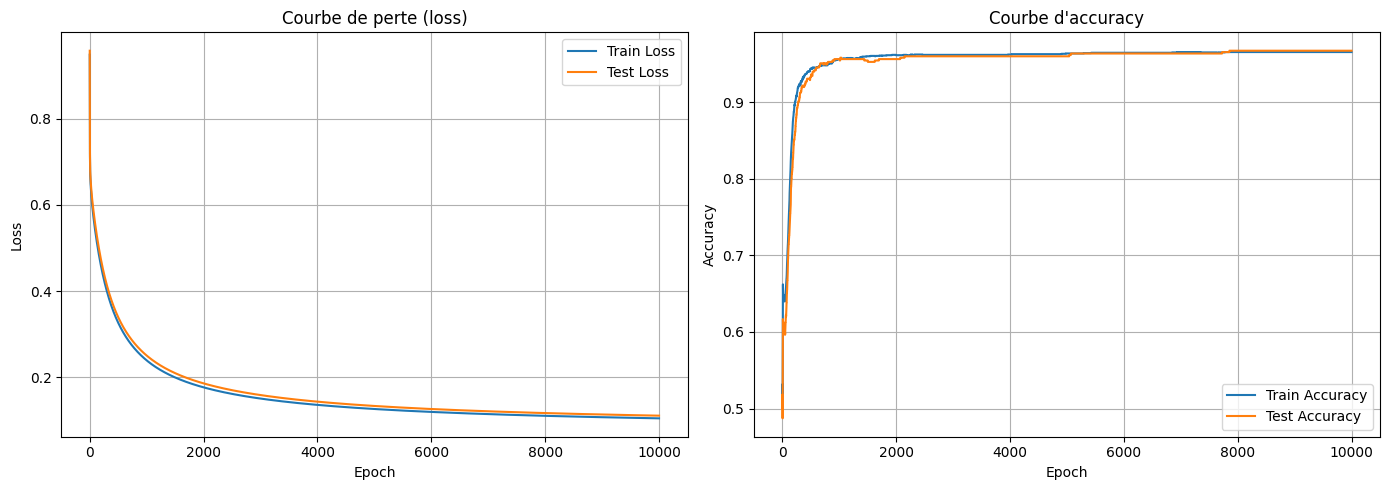

In [13]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Courbe de perte (Loss)
axs[0].plot(model.train_loss, label='Train Loss')
axs[0].plot(model.test_loss, label='Test Loss')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].set_title('Courbe de perte (loss)')
axs[0].grid(True)
axs[0].legend()

# Courbe d'accuracy
axs[1].plot(model.train_accuracy, label='Train Accuracy')
axs[1].plot(model.test_accuracy, label='Test Accuracy')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Accuracy')
axs[1].set_title('Courbe d\'accuracy')
axs[1].grid(True)
axs[1].legend()

plt.tight_layout()
plt.show()

In [14]:
gfzeds

NameError: name 'gfzeds' is not defined

# Régression Linéaire

In [ ]:
df = pd.read_csv("../data/swedish_insurance.csv", sep=',')

df

,X,Y
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4
...,...,...
58,9,87.4
59,31,209.8
60,14,95.5
61,53,244.6


In [ ]:
train_df, test_df = split_dataframe(df, test_ratio=0.2)

In [ ]:
Y_train = [ x for x in train_df["Y"] ]
print(f"Y_train len : {len(Y_train)}")
Y_test = [x for x in test_df["Y"]]
print(f"Y_test len : {len(Y_test)}")
Y_train = projetannuel.float_labels(Y_train)

Y_train len : 51
Y_test len : 12


In [ ]:
X = train_df[['X']].values

In [ ]:
print(len(X))

51


In [ ]:
model = projetannuel.RBF(
    X,
    Y_train,
    gamma = 0.1,
    k=30
)

model

In [ ]:
model.train_regression()

In [ ]:
Y_pred = []

for v in test_df[['X']].values:
    pred = model.predict(v)
    Y_pred.append(pred)

In [ ]:
print(f"MSE : {projetannuel.mean_squared_error(Y_pred, Y_test)}")
print(f"RMSE : {projetannuel.root_mean_squared_error(Y_pred, Y_test)}")

MSE : 6215125.247314946
RMSE : 2493.015292234475
